## TERCER ANÁLISIS SELECCIONANDO SÓLO LA TIPOLOGÍA PISOS Y ELIMINANDO OUTLIERS.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyod.models.knn import KNN

In [122]:
data = pd.read_csv("../outputs/house_fit.csv", index_col=0)

In [123]:
data.head()

,house_type_id,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
0,0,0,0,64.0,2,1.0,3.0,1,0,0,0,0,0,0,40.343263,-3.688352,85000
1,0,1,0,70.0,3,1.0,4.0,1,1,0,0,1,0,0,40.355109,-3.700105,129900
2,0,0,0,94.0,2,2.0,1.0,1,1,0,1,0,0,0,40.345539,-3.710970,144247
3,0,0,0,64.0,2,1.0,0.0,1,1,0,1,0,0,0,40.345539,-3.710970,109900
4,0,0,0,108.0,2,2.0,4.0,1,1,1,1,0,0,1,40.355841,-3.688399,260000


In [124]:
# Para este análisis, vamos a quedarnos sólo con la tipología piso.

data.house_type_id.value_counts()

0    15858
2      910
1      630
Name: house_type_id, dtype: int64

In [125]:
# La tipología pisos se corresponde con el valor 0 de la columna house_type_id, eliminamos los otros datos.

data = data.drop(data[data["house_type_id"]==1].index)
data = data.drop(data[data["house_type_id"]==2].index)

In [126]:
# Eliminamos ahora la columna house_type_id, ya que al sólo existir una tipología, ya no es necesaria.

data = data.drop("house_type_id", axis=1)

In [127]:
# Eliminamos los outliers

clf = KNN(contamination=0.5, method="largest", algorithm="auto")
clf.fit(data)
y_pred = clf.predict(data)
dropea = data[y_pred == 1]
data = data.drop(dropea.index)

In [128]:
# Vamos a analizar nuestra tabla resultante.

data.describe()

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8.936000e+03
mean,0.197180,0.019919,98.747650,2.654432,1.593218,2.377294,0.885295,0.717659,0.255148,0.276858,0.360900,0.160474,0.147941,40.421701,-3.690347,4.070591e+05
std,0.397892,0.139731,56.850997,1.028246,0.825337,1.859554,0.318683,0.450164,0.435969,0.447471,0.480288,0.367066,0.355061,0.035336,0.035922,4.044666e+05
min,0.000000,0.000000,25.000000,0.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,7.000000e+04
25%,0.000000,0.000000,65.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.392825,-3.710970,1.750000e+05
50%,0.000000,0.000000,83.000000,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.422742,-3.695211,2.850000e+05
75%,0.000000,0.000000,113.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.445414,-3.667741,4.950000e+05
max,1.000000,1.000000,562.000000,9.000000,7.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,4.350000e+06


In [129]:
data.to_csv("../outputs/3_houses_no_typologies_no_outliers.csv")

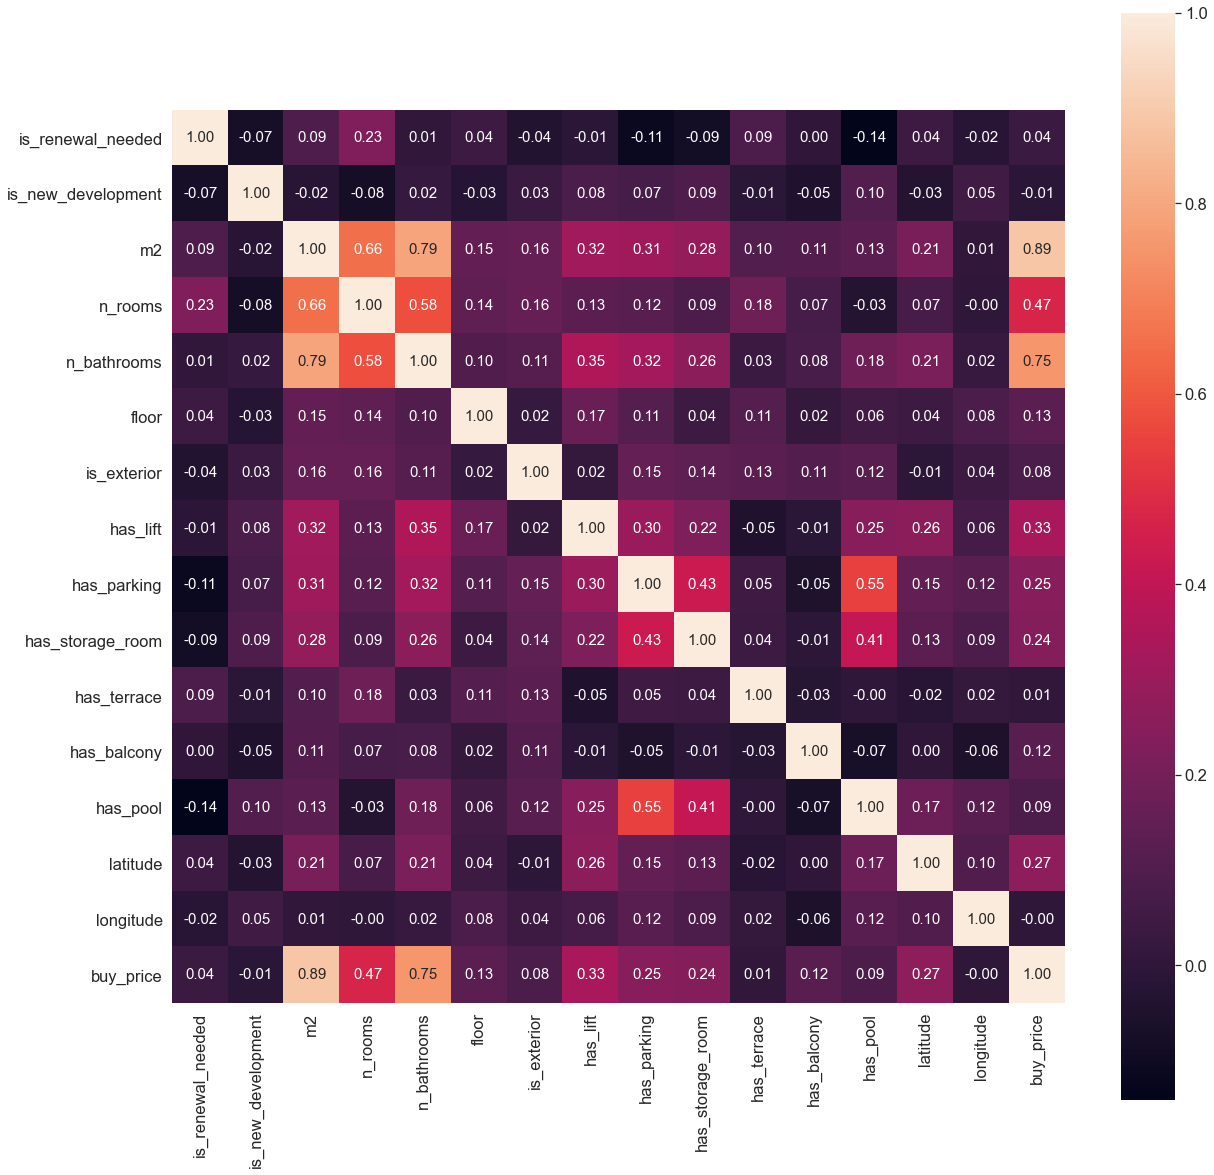

In [12]:
# Vamos a realizar un heatmap para ver la relación entre los datos.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                yticklabels=data.columns, xticklabels=data.columns)

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


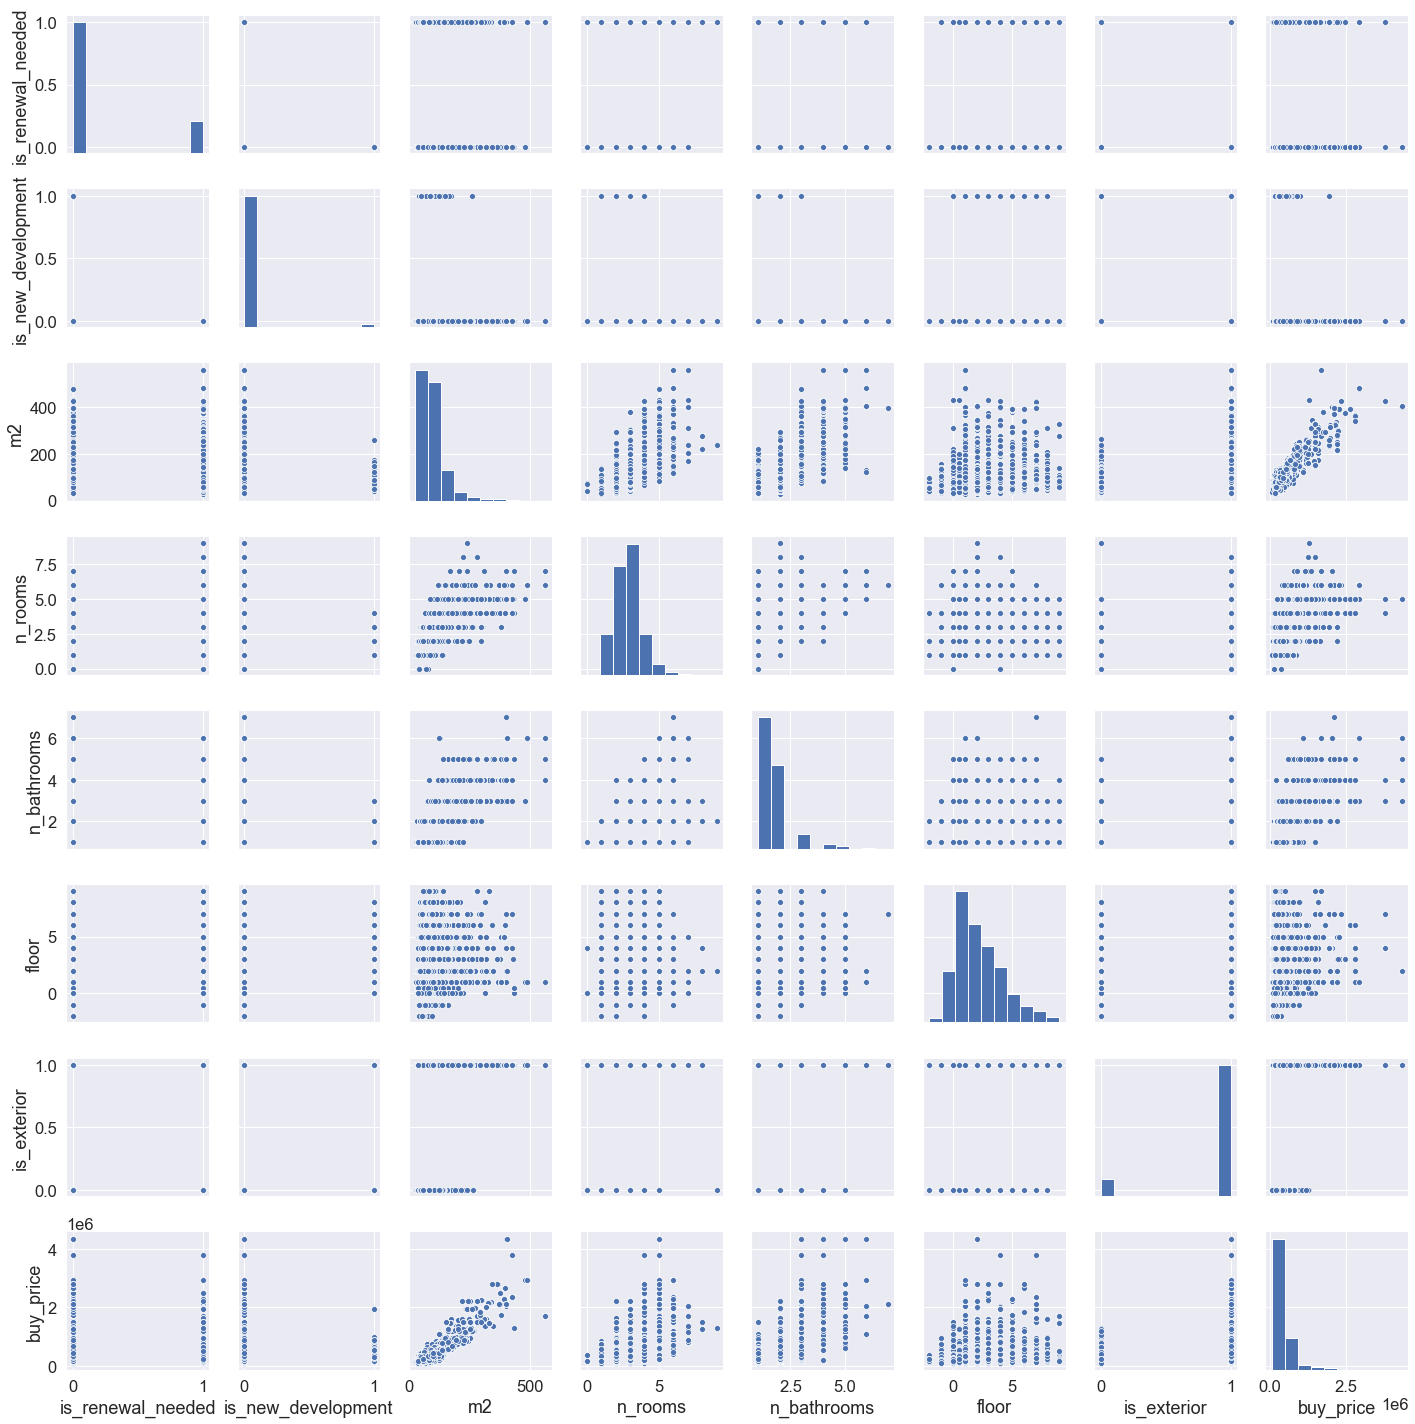

In [14]:
# Vamos a realizar ahora un pairplot para ver como se relacionan los datos entre sí.
# Como tenemos muchas features, vamos a dividirlas en dos análisis.

d_analysis_1 = data[["is_renewal_needed", "is_new_development","m2", "n_rooms",
                    "n_bathrooms", "floor", "is_exterior", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_1)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


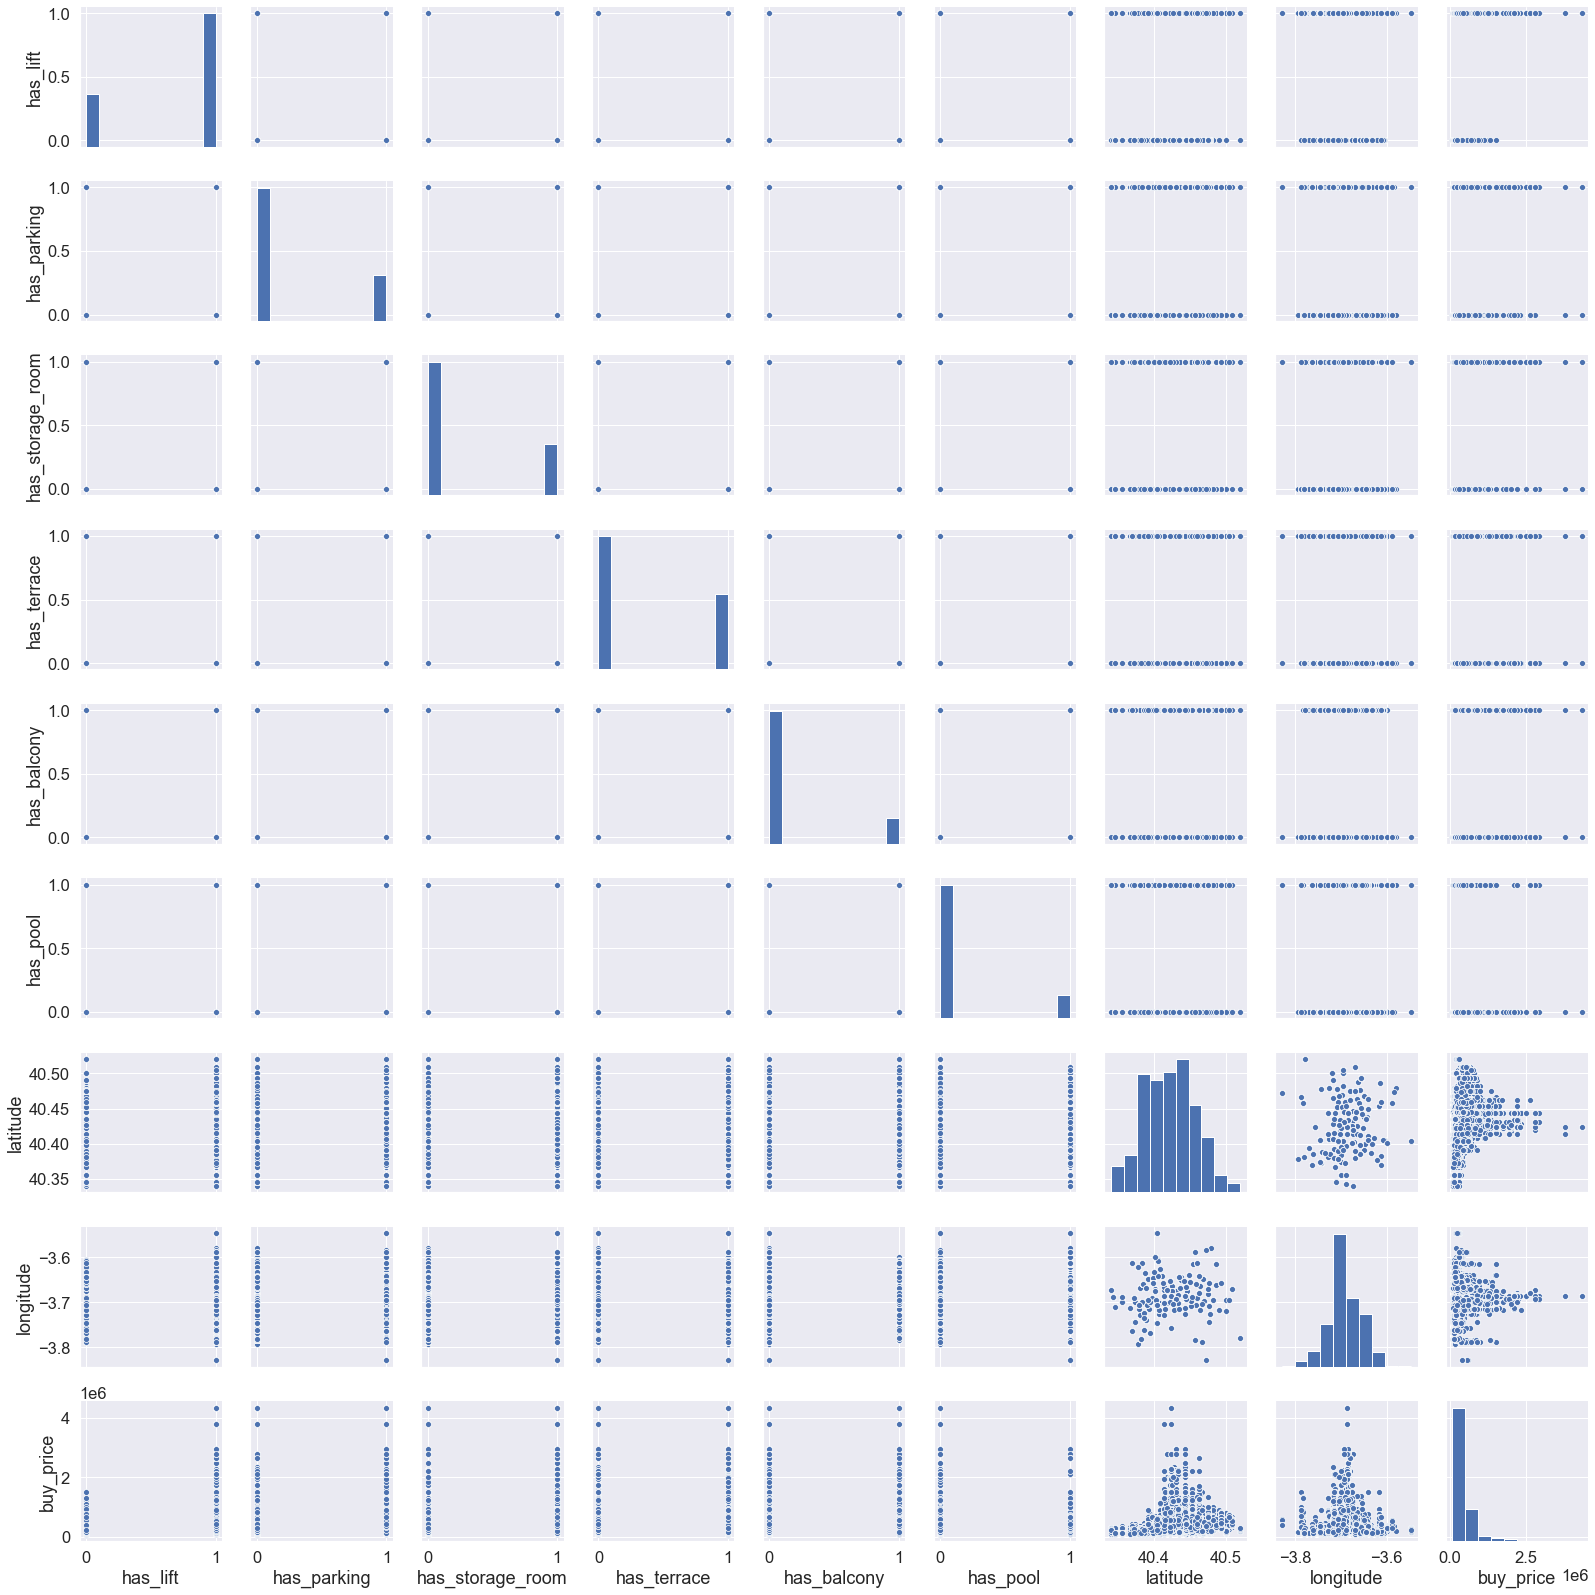

In [15]:
d_analysis_2 = data[["has_lift", "has_parking", "has_storage_room", "has_terrace",
              "has_balcony", "has_pool", "latitude", "longitude", "buy_price"]]

sns.pairplot(data, size=2.5, vars=d_analysis_2)
plt.tight_layout()

## Nos metemos ya de lleno con el entrenamiento de nuestro modelo.

### Empezaremos entrenando los datos con el módulo sklearn.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [17]:
X = data.drop(["buy_price"], axis=1)
y = data['buy_price']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [19]:
models = {"DecisionTree" : DecisionTreeRegressor(),
          "RandomForest": RandomForestRegressor(),
          "ExtraTrees" : ExtraTreesRegressor(),
          "GradientBoosting" : GradientBoostingRegressor(),
          "HistGradientBoosting": HistGradientBoostingRegressor(),
          "Voting": VotingRegressor(
              [('etr', ExtraTreesRegressor()),
               ('rf', RandomForestRegressor())]
          )
         }

In [20]:
# Entrenamos los datos

for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Entrenamiento finalizado")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Entrenamiento finalizado


-------DecisionTree-------
RMSE 78880.062
R2 0.96
-------RandomForest-------
RMSE 66356.402
R2 0.972
-------ExtraTrees-------
RMSE 66615.632
R2 0.972
-------GradientBoosting-------
RMSE 83858.707
R2 0.955
-------HistGradientBoosting-------
RMSE 71097.144
R2 0.968
-------Voting-------
RMSE 63852.513
R2 0.974


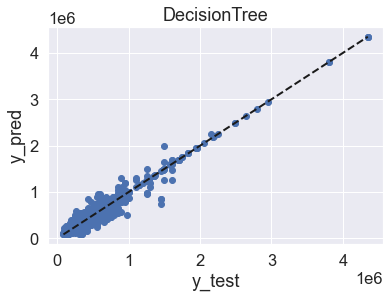

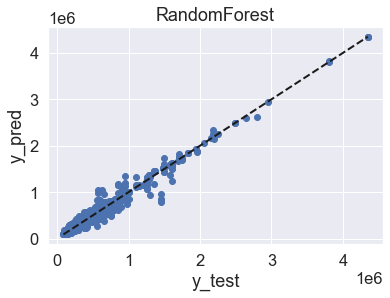

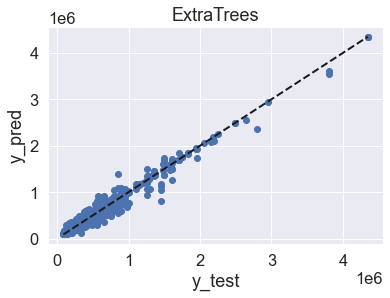

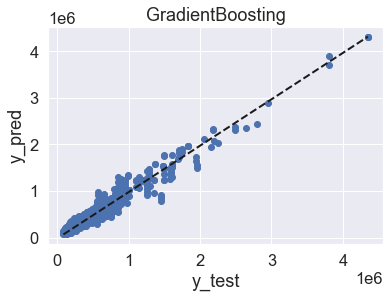

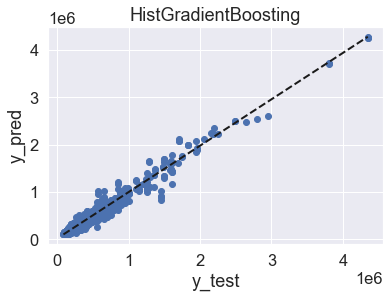

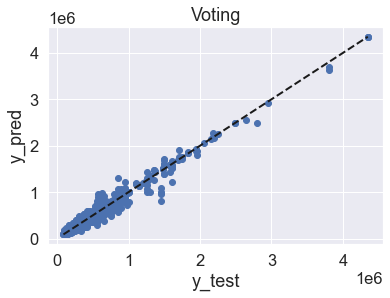

In [21]:
# Comprobamos el resultado de las métricas seleccionadas.

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
    plt.xlabel("y_test")
    plt.ylabel("y_pred")

In [22]:
# Aplicamos un crossvalidation para ver cual es el modelo que mejor funciona.

for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.7666267981018101
RandomForest accuracy0.880166857908027
ExtraTrees accuracy0.8685338304604869
GradientBoosting accuracy0.8020071087249507
HistGradientBoosting accuracy0.877891281239753
Voting accuracy0.8821853078183877


In [23]:
# Como podemos comprobar, el modelo que mejores datos arroja de nuevo es VotingRegressor.
# Estos datos siguen sin ser buenos, R2 sigue mejorando (0.974), pero el RMSE sigue siendo 
# muy alto (63852 €).
# En este caso, el crossvalidation indica que Voting también es el mejor modelo.
# Como podemos ver en las gráficas, continuamos mejorando la dispersión de los datos.

### Vamos a entrenar nuestros datos con el módulo xgboost,  para ver si mejoran los resultados.

In [24]:
from xgboost import XGBRegressor

RMSE 63640.538
R2 0.974


Text(0, 0.5, 'y_pred')

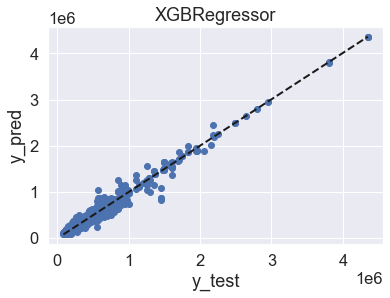

In [25]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print("R2", round(r2_score(y_test,y_pred),3))

# Ploteamos las gráficas.
plt.figure()
plt.title("XGBRegressor")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [26]:
# Nuestros datos mejoran por muy poco con respecto a los modelos de sklearn.

### Vamos a entrenar ahora con el módulo H2O.

In [27]:
# Comprobamos ahora si con el módulo H2O podemos obtener aún mejores resultados.
# Vamos a trabajar con cuatro modelos:
    # H2OAutoML
    # H2ORandomForestEstimator.
    # H2OGradientBoostingEstimator.
    # H2OXGBoostEstimator.

In [28]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OXGBoostEstimator

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 mins 16 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_Javi_lbrz9m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.582 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


#### H2OAutoML

In [29]:
h2train = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [30]:
X = list(data.drop(["buy_price"], axis=1))
y = "buy_price"

In [31]:
automl = H2OAutoML(max_runtime_secs=1200, sort_metric='RMSE')
automl.train(X, y, training_frame=h2train)
leader_board = automl.leaderboard
leader_board.head()

AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,rmse,mean_residual_deviance,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201015_155220,62845.2,3.94951e+09,3.94951e+09,36789,0.144225
StackedEnsemble_BestOfFamily_AutoML_20201015_155220,64062.9,4.10405e+09,4.10405e+09,37306.3,0.146775
GBM_grid__1_AutoML_20201015_155220_model_8,67676.1,4.58005e+09,4.58005e+09,38123.6,0.150149
GBM_4_AutoML_20201015_155220,68185.6,4.64928e+09,4.64928e+09,40085.5,0.150471
GBM_1_AutoML_20201015_155220,68419.6,4.68125e+09,4.68125e+09,41576.8,0.156399
GBM_grid__1_AutoML_20201015_155220_model_23,68454.4,4.686e+09,4.686e+09,38978.3,0.15412
XGBoost_1_AutoML_20201015_155220,68995.8,4.76042e+09,4.76042e+09,40781.4,0.160098
XGBoost_grid__1_AutoML_20201015_155220_model_25,69244.8,4.79484e+09,4.79484e+09,42141.1,0.159531
GBM_grid__1_AutoML_20201015_155220_model_26,69607.4,4.8452e+09,4.8452e+09,40427.5,0.15451
XRT_1_AutoML_20201015_155220,69732.5,4.86263e+09,4.86263e+09,40206.7,0.154678


#### Importamos ahora el csv para trabajar con el resto de modelos.

In [76]:
data = h2o.import_file("../outputs/houses_no_typologies_no_outliers.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [77]:
data.describe()

Rows:8936
Cols:17




,C1,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
type,int,int,int,int,int,int,real,int,int,int,int,int,int,int,real,real,int
mins,0.0,0.0,0.0,25.0,0.0,1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.3399339,-3.828782660082677,70000.0
mean,8657.429162936436,0.19717994628469113,0.01991942703670546,98.74764995523722,2.6544315129811995,1.593218442256043,2.377294091316025,0.8852954341987467,0.7176589077887198,0.25514771709937334,0.276857654431513,0.36089973142345566,0.16047448522829005,0.14794091316025068,40.42170138736758,-3.6903470850956634,407059.14100268576
maxs,17397.0,1.0,1.0,562.0,9.0,7.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.5205538,-3.5466159,4350000.0
sigma,5011.955995100933,0.3978916082470404,0.13973127218389383,56.85099654966865,1.028245990357177,0.8253366841168109,1.859553982877445,0.31868290433389357,0.45016361190961923,0.4359686107373205,0.44747055849559786,0.4802883817255223,0.3670660742623666,0.3550612726116134,0.03533590149344936,0.035922480393975456,404466.5903351918
zeros,1,7174,8758,0,4,0,965,1025,2523,6656,6462,5711,7502,7614,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,0.0,0.0,64.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.34326305,-3.688352297394898,85000.0
1,1.0,1.0,0.0,70.0,3.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.3551089,-3.7001047141537535,129900.0
2,3.0,0.0,0.0,64.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,40.3455389,-3.7109697,109900.0


In [78]:
X = data.col_names[1:-1]
y = data.col_names[-1]

train, test =data.split_frame([0.8], seed=1234)
train.shape, test.shape

((7172, 17), (1764, 17))

#### H2ORandomForestEstimator

In [79]:
rf_h2o = H2ORandomForestEstimator()
rf_h2o.train(X, y, training_frame=train)
print(rf_h2o)

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1602768662645_10


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,2234495.0,20.0,20.0,20.0,3363.0,3764.0,3551.1




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 5626288165.281957
RMSE: 75008.58727693754
MAE: 41690.79085225725
RMSLE: 0.15720646579722838
Mean Residual Deviance: 5626288165.281957

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 16:30:23,0.020 sec,0.0,NaN,NaN,NaN
1,,2020-10-15 16:30:23,0.272 sec,1.0,120584.487917,59787.315598,1.454062e+10
2,,2020-10-15 16:30:24,0.470 sec,2.0,144635.319153,64082.040157,2.091938e+10
3,,2020-10-15 16:30:24,0.628 sec,3.0,133451.980390,61039.952282,1.780943e+10
4,,2020-10-15 16:30:24,0.797 sec,4.0,128237.864045,58850.623976,1.644495e+10
5,,2020-10-15 16:30:24,0.929 sec,5.0,117977.449074,55645.813279,1.391868e+10
6,,2020-10-15 16:30:24,1.052 sec,6.0,116194.747845,54625.203098,1.350122e+10
7,,2020-10-15 16:30:24,1.175 sec,7.0,111257.122359,53089.657966,1.237815e+10
8,,2020-10-15 16:30:25,1.304 sec,8.0,100619.152358,50896.853988,1.012421e+10
9,,2020-10-15 16:30:25,1.438 sec,9.0,96652.105445,50077.084228,9.341629e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,2.204939e+16,1.000000,0.506859
1,n_bathrooms,1.037446e+16,0.470510,0.238482
2,latitude,3.391765e+15,0.153826,0.077968
3,n_rooms,3.167841e+15,0.143670,0.072821
4,longitude,1.654134e+15,0.075019,0.038024
5,has_lift,8.744635e+14,0.039659,0.020102
6,floor,6.477423e+14,0.029377,0.014890
7,has_parking,4.597656e+14,0.020852,0.010569
8,has_pool,1.954398e+14,0.008864,0.004493
9,has_storage_room,1.833551e+14,0.008316,0.004215


In [80]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(rf_h2o.rmse(),3))
print("R2: ", round(rf_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", rf_h2o.model_performance(test).rmse())
print("R2: ", rf_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  75008.587
R2:  0.964
-------test metrics-------
RMSE:  64661.08619718252
R2:  0.977744533518691


In [81]:
# Como podemos observar, existe algo de underfittig, pero los datos están muy ajustados.

In [82]:
predict = rf_h2o.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  64661.08619718252
R2:  0.977744533518691


Text(0, 0.5, 'y_pred')

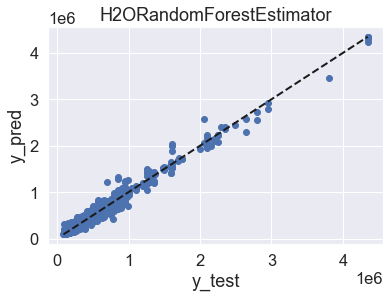

In [83]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", rf_h2o.model_performance(test, predict).rmse())
print("R2: ", rf_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2ORandomForestEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [84]:
# La dispersión está bastante ajustada.
# La gran mayoría de las viviendas están ajustadas a su precio real, salvo algunos datos atípicos que están
# por encima de su precio.

In [85]:
print(predict, test[-1])

predict
263509
129318
142778
137298
290500
223240
115543
259140
100659
225302


buy_price
260000
129900
138000
139000
275000
179000
123000
204999
100000
210000


#### H2OGradientBoostingEstimator

In [86]:
gbm_h2o = H2OGradientBoostingEstimator()
gbm_h2o.train(X, y, training_frame=train)
print(gbm_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1602768662645_11


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,20321.0,5.0,5.0,5.0,15.0,32.0,27.62




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 4551916597.360966
RMSE: 67467.89308523697
MAE: 44416.94595301171
RMSLE: 0.1675182018274425
Mean Residual Deviance: 4551916597.360966

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 16:31:50,0.014 sec,0.0,396949.054087,243533.872363,1.575686e+11
1,,2020-10-15 16:31:50,0.047 sec,1.0,360851.547205,222242.453504,1.302138e+11
2,,2020-10-15 16:31:50,0.059 sec,2.0,328650.477621,203091.025185,1.080111e+11
3,,2020-10-15 16:31:50,0.070 sec,3.0,300018.834931,186061.597541,9.001130e+10
4,,2020-10-15 16:31:50,0.081 sec,4.0,274475.737782,171080.414551,7.533693e+10
5,,2020-10-15 16:31:50,0.093 sec,5.0,251721.167998,157665.516775,6.336355e+10
6,,2020-10-15 16:31:50,0.106 sec,6.0,231573.322872,145723.268658,5.362620e+10
7,,2020-10-15 16:31:50,0.117 sec,7.0,213736.051505,135284.474776,4.568310e+10
8,,2020-10-15 16:31:50,0.129 sec,8.0,197683.454346,126056.424733,3.907875e+10
9,,2020-10-15 16:31:50,0.141 sec,9.0,183408.986156,117798.415182,3.363886e+10



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,4.933379e+15,1.000000,0.854120
1,latitude,3.768415e+14,0.076386,0.065243
2,longitude,1.778391e+14,0.036048,0.030789
3,n_bathrooms,1.371302e+14,0.027796,0.023741
4,n_rooms,5.444995e+13,0.011037,0.009427
5,has_lift,4.227845e+13,0.008570,0.007320
6,floor,1.850468e+13,0.003751,0.003204
7,has_pool,1.210002e+13,0.002453,0.002095
8,has_terrace,1.148057e+13,0.002327,0.001988
9,is_renewal_needed,4.947545e+12,0.001003,0.000857


In [87]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(gbm_h2o.rmse(),3))
print("R2: ", round(gbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", gbm_h2o.model_performance(test).rmse())
print("R2: ", gbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  67467.893
R2:  0.971
-------test metrics-------
RMSE:  76842.50374017292
R2:  0.968569323837825


In [88]:
# Como podemos observar, existe un poco de overfitting.

In [89]:
predict = gbm_h2o.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


RMSE:  76842.50374017292
R2:  0.968569323837825


Text(0, 0.5, 'y_pred')

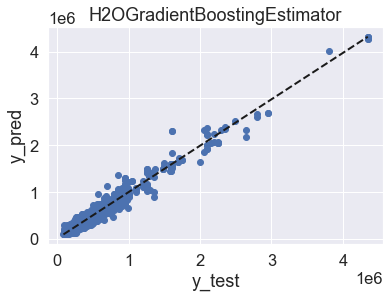

In [90]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", gbm_h2o.model_performance(test, predict).rmse())
print("R2: ", gbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OGradientBoostingEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [91]:
# Existe mayor dispersión de los datos con respecto a H2ORandomForestEstimator.
# Existe una mayoría de viviendas predecidas por debajo de su precio.

In [92]:
print(predict, test[-1])

predict
266243
150756
139087
130879
296020
226884
128099
271129
114487
231222


buy_price
260000
129900
138000
139000
275000
179000
123000
204999
100000
210000


#### H2OXGBoostEstimator

In [93]:
xgbm_h2o = H2OXGBoostEstimator()
xgbm_h2o.train(X, y, training_frame=train)
print(xgbm_h2o)

xgboost Model Build progress: |███████████████████████████████████████████| 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1602768662645_12


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 1803244803.1851063
RMSE: 42464.630025294064
MAE: 29371.91525202175
RMSLE: 0.12593671212186577
Mean Residual Deviance: 1803244803.1851063

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-10-15 16:31:53,0.037 sec,0.0,566776.062536,404557.231456,3.212351e+11
1,,2020-10-15 16:31:53,0.086 sec,1.0,408005.009944,284544.039824,1.664681e+11
2,,2020-10-15 16:31:53,0.109 sec,2.0,297481.482957,200292.212369,8.849523e+10
3,,2020-10-15 16:31:53,0.140 sec,3.0,220443.622273,142530.803790,4.859539e+10
4,,2020-10-15 16:31:53,0.173 sec,4.0,167479.928742,104833.828820,2.804953e+10
5,,2020-10-15 16:31:53,0.210 sec,5.0,131010.500281,80876.484010,1.716375e+10
6,,2020-10-15 16:31:53,0.254 sec,6.0,106555.579199,66183.135549,1.135409e+10
7,,2020-10-15 16:31:54,0.289 sec,7.0,90731.092747,57526.784656,8.232131e+09
8,,2020-10-15 16:31:54,0.320 sec,8.0,80044.470761,51915.885989,6.407117e+09
9,,2020-10-15 16:31:54,0.349 sec,9.0,73326.325388,48397.867380,5.376750e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,m2,1.876399e+15,1.000000,0.873464
1,latitude,1.182959e+14,0.063044,0.055067
2,longitude,6.227924e+13,0.033191,0.028991
3,n_bathrooms,2.599652e+13,0.013854,0.012101
4,n_rooms,1.862578e+13,0.009926,0.008670
5,has_lift,1.713718e+13,0.009133,0.007977
6,floor,1.239005e+13,0.006603,0.005768
7,has_terrace,4.987086e+12,0.002658,0.002321
8,has_pool,4.377172e+12,0.002333,0.002038
9,has_parking,2.167203e+12,0.001155,0.001009


In [94]:
# Vamos a comprobar que no tenemos overfitting entre los datos entrenados y los datos del test.

# Datos entrenados.
print("-------train metrics-------")
print("RMSE: ", round(xgbm_h2o.rmse(),3))
print("R2: ", round(xgbm_h2o.r2(),3))

# Datos test.
print("-------test metrics-------")
print("RMSE: ", xgbm_h2o.model_performance(test).rmse())
print("R2: ", xgbm_h2o.model_performance(test).r2())

-------train metrics-------
RMSE:  42464.63
R2:  0.989
-------test metrics-------
RMSE:  65554.19803230363
R2:  0.9771254937959293


In [95]:
# Como podemos observar, hay mucho overfittig.

In [96]:
predict = xgbm_h2o.predict(test)

xgboost prediction progress: |████████████████████████████████████████████| 100%


RMSE:  65554.19803230363
R2:  0.9771254937959293


Text(0, 0.5, 'y_pred')

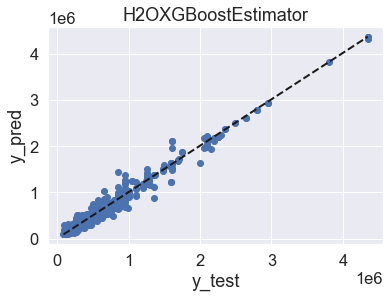

In [97]:
# Plots y relación test, predict.
y_pred = predict.as_data_frame()
y_test = test[-1].as_data_frame()
print("RMSE: ", xgbm_h2o.model_performance(test, predict).rmse())
print("R2: ", xgbm_h2o.model_performance(test, predict).r2())
plt.figure()
plt.title("H2OXGBoostEstimator")
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [98]:
# Los datos están algo más concentrados, pero sigue existiendo dispersión.
# Los datos están bastante equilibrados, existiendo precios por encima y por debajo de su precio real.

In [99]:
print(predict, test[-1])

predict
296547
124910
140845
135970
285404
203016
112916
263058
99361
204362


buy_price
260000
129900
138000
139000
275000
179000
123000
204999
100000
210000


In [100]:
# En este test, nos vamos a quedar con RandomForestRegressor, que parece ser el modelo más equilibrado y
# que más se ajusta a la realidad.

## Tasación manual.

In [101]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn import preprocessing

In [102]:
vivienda = {'neighborhood_id': "Malasaña-Universidad, Centro(Madrid)",
            'is_renewal_needed': True,
            'is_new_development': False,  
            'm2': 90,             
            'n_rooms': 2,           
            'n_bathrooms': 2,   
            'floor': 2,            
            'is_exterior': True,      
            'has_lift': True,              
            'has_parking': True,      
            'has_storage_room': True,      
            'has_terrace': True,       
            'has_balcony': True,       
            'has_pool': True              
           }

In [103]:
geolocator = Nominatim(user_agent="http")

locate = geolocator.geocode(vivienda["neighborhood_id"], timeout=7)
vivienda["latitude"] = locate.latitude
vivienda["longitude"] = locate.longitude

In [104]:
vivienda.pop("neighborhood_id")

'Malasaña-Universidad, Centro(Madrid)'

In [105]:
piso = pd.DataFrame.from_dict(vivienda, orient='index').T
piso

,is_renewal_needed,is_new_development,m2,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude
0,True,False,90,2,2,2,True,True,True,True,True,True,True,40.4267,-3.70423


In [106]:
def transf(column):

    le = preprocessing.LabelEncoder()
    piso[column] = le.fit_transform(piso[column])
    return piso[column]

In [107]:
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [108]:
piso.to_csv("../outputs/new_piso.csv")

In [109]:
piso = h2o.import_file("../outputs/new_piso.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [111]:
estimated_price = rf_h2o.predict(piso)
print(estimated_price)

drf prediction progress: |████████████████████████████████████████████████| 100%


predict
415880


## Continuamos mejorando en nuestros análisis, pero los datos siguen aún sin ser los mejores. El RMSE sigue siendo muy alto (64500 €), mientras que el R2 continuamos mejorando (0.977).
## Vamos a realizar un nuevo análisis acotando los datos en los puntos más concentrados y eliminando outliers que nos puedan estar afectando a la hora de predecir los precios.